In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, color, img_as_float, img_as_int, img_as_ubyte, exposure

# Gambar Original

In [2]:
im = io.imread('0_eye.jpg')

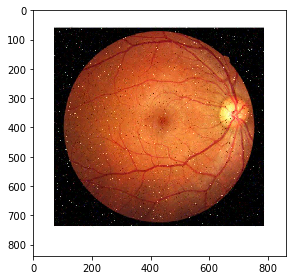

In [3]:
io.imshow(im)

# Gambar Grayscale

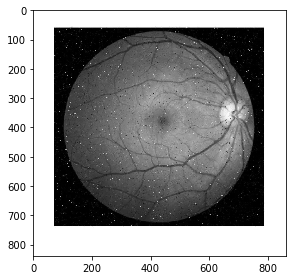

In [4]:
imggray=color.rgb2gray(im)
gray = img_as_ubyte(imggray)
io.imshow(gray)

Y = 0.2125 R + 0.7154 G + 0.0721 B

# Gambar Black & White

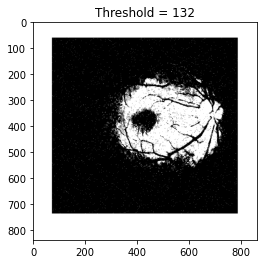

In [5]:
from skimage.filters import threshold_mean

thresh = threshold_mean(gray)
binary = gray > thresh

plt.imshow(binary, cmap=plt.cm.gray)
plt.title('Threshold = %d' % thresh)

plt.show()

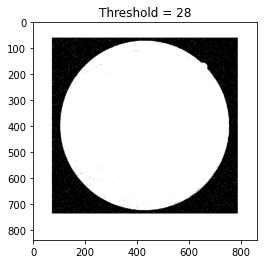

In [6]:
from skimage.filters import threshold_minimum

thresh_min = threshold_minimum(gray)
binary_min = gray > thresh_min

plt.imshow(binary_min, cmap=plt.cm.gray)
plt.title('Threshold = %d' % thresh_min)

plt.show()

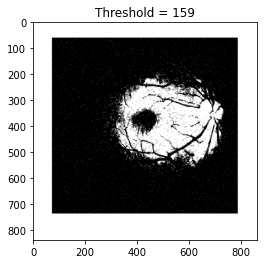

In [7]:
from skimage.filters import threshold_otsu

thresh_o = threshold_otsu(gray)
binary_o = gray > thresh

plt.imshow(binary_o, cmap=plt.cm.gray)
plt.title('Threshold = %d' % thresh_o)

plt.show()

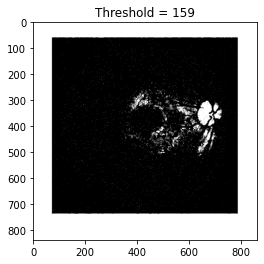

In [8]:
threshold_global_otsu = threshold_otsu(gray)
global_otsu = gray >= threshold_global_otsu

plt.imshow(global_otsu, cmap=plt.cm.gray)
plt.title('Threshold = %d' % threshold_global_otsu)

plt.show()

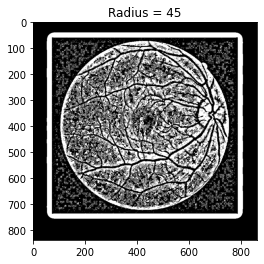

In [37]:
from skimage.filters import threshold_local

block_size = 45
local_thresh = threshold_local(gray, block_size, offset=-1)
binary_local = gray > local_thresh

plt.imshow(binary_local, cmap=plt.cm.gray)
plt.title('Radius = %d' % block_size)

plt.show()

In [10]:
local_thresh

array([[245., 245., 245., ..., 245., 245., 245.],
       [245., 245., 245., ..., 245., 245., 245.],
       [245., 245., 245., ..., 245., 245., 245.],
       ...,
       [245., 245., 245., ..., 245., 245., 245.],
       [245., 245., 245., ..., 245., 245., 245.],
       [245., 245., 245., ..., 245., 245., 245.]])

# Noise Reduction

In [11]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,denoise_wavelet, estimate_sigma)
from skimage.filters.rank import median
from skimage.morphology import disk, ball

### Noise Removal

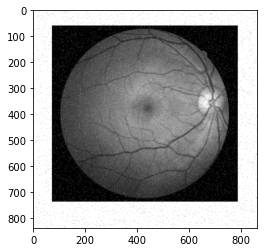

In [12]:
rng = np.random.default_rng()
noise = rng.random(gray.shape)
noisy_image = img_as_ubyte(gray)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

plt.imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)

### Median

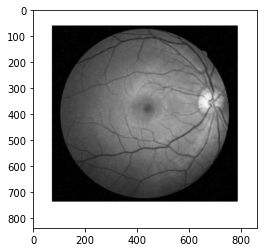

In [70]:
plt.imshow(median(gray, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)

### Bilateral Mean

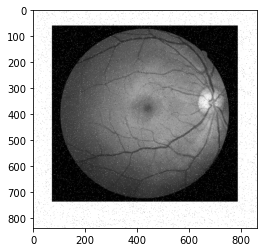

In [71]:
from skimage.filters.rank import mean_bilateral

bilat = mean_bilateral(gray.astype(np.uint16), disk(20), s0=10, s1=10)

plt.imshow(bilat, cmap=plt.cm.gray)

### Estimate Sigma

In [15]:
sigma_est = estimate_sigma(im, average_sigmas=True)

<ipython-input-15-19d59e79e516>:1: UserWarning: image is size 3 on the last axis, but multichannel is False.  If this is a color image, please set multichannel to True for proper noise estimation.
  sigma_est = estimate_sigma(im, average_sigmas=True)


In [16]:
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

Estimated Gaussian noise standard deviation = 0.1102749980619716


### Denoise TV

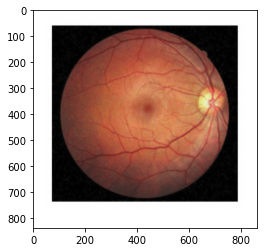

In [17]:
plt.imshow(denoise_tv_chambolle(im, weight=0.1))

### Denoise wavelet

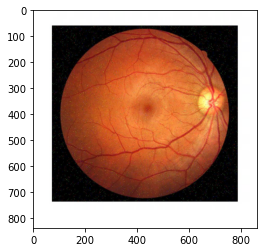

In [18]:
plt.imshow(denoise_wavelet(im, rescale_sigma=True, multichannel=True))

### Denoise Bilateral

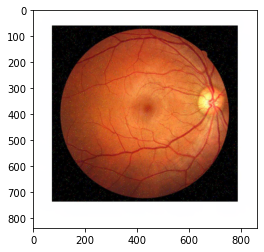

In [19]:
plt.imshow(denoise_bilateral(im, sigma_color=0.05, sigma_spatial=15, multichannel=True))

## Image Denoising use OpenCV

OpenCV provides four variations of this technique.

* cv.fastNlMeansDenoising() - works with a single grayscale images
* cv.fastNlMeansDenoisingColored() - works with a color image.
* cv.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
* cv.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

Common arguments are:
* h : parameter deciding filter strength. Higher h value removes noise better, but removes details of image also. (10 is ok)
* hForColorComponents : same as h, but for color images only. (normally same as h)
* templateWindowSize : should be odd. (recommended 7)
* searchWindowSize : should be odd. (recommended 21)

### Denoising Open CV

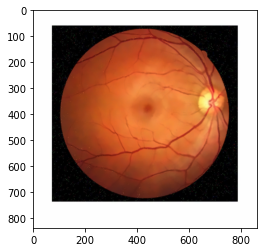

In [20]:
dst = cv2.fastNlMeansDenoisingColored(im,None,10,10,7,21)
plt.imshow(dst)

Parameters
* src	Input 8-bit 3-channel image.
* dst	Output image with the same size and type as src .
* templateWindowSize	Size in pixels of the template patch that is used to compute weights. Should be odd. Recommended value 7 pixels
* searchWindowSize	Size in pixels of the window that is used to compute weighted average for given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater denoising time. Recommended value 21 pixels
* h	Parameter regulating filter strength for luminance component. Bigger h value perfectly removes noise but also removes image details, smaller h value preserves details but also preserves some noise
* hColor	The same as h but for color components. For most images value equals 10 will be enough to remove colored noise and do not distort colors

### Avarage Filter

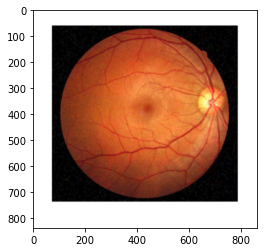

In [21]:
average = cv2.blur(im,(3,3))
plt.imshow(average, cmap = 'gray')

### Gausisan Filter

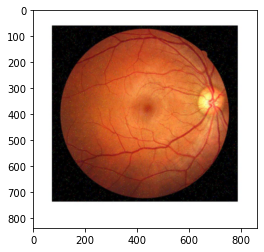

In [22]:
gaussian = cv2.GaussianBlur(im,(3,3),0)
plt.imshow(gaussian, cmap='gray')

# Image Segmentation

In [23]:
from skimage import feature

### Laplacian

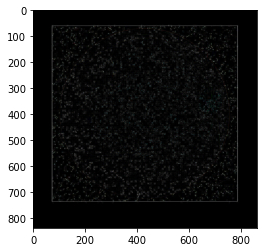

In [24]:
laplacian = cv2.Laplacian(im,-1,1,1)
plt.imshow(laplacian, cmap='gray')

### Canny, Dilasi, Erosi

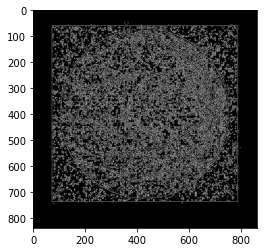

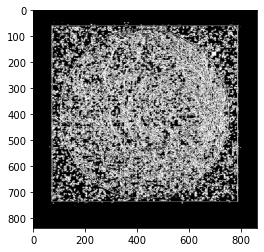

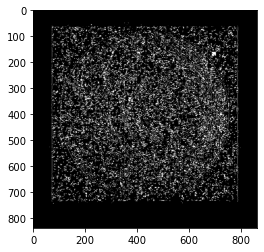

In [25]:
cannycv = cv2.Canny(im,40,40)

kernel = np.ones((1,3),np.uint8)
dilasi = cv2.dilate(cannycv, kernel, iterations = 1)

kernel_erosi = np.ones((2,3),np.uint8)
erosi = cv2.erode(dilasi, kernel_erosi, iterations = 1)

plt.imshow(cannycv, cmap='gray')
plt.show()
plt.imshow(dilasi,'gray')
plt.show()
plt.imshow(erosi,'gray')
plt.show()

### Canny Edge Detector

Text(0.5, 1.0, 'Canny filter, $\\sigma=3$')

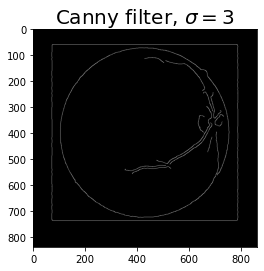

In [26]:
edges1 = feature.canny(gray, sigma =3)

plt.imshow(edges1, cmap='gray')
plt.title(r'Canny filter, $\sigma=3$', fontsize=20)

### Edge-based Segmentation

In [27]:
from skimage.feature import canny
from scipy import ndimage as ndi

Text(0.5, 1.0, 'Canny filter, $\\sigma=2$')

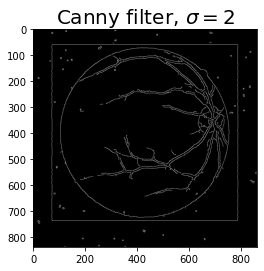

In [28]:
edges = canny(gray/255., sigma =2)

plt.imshow(edges, cmap='gray')
plt.title(r'Canny filter, $\sigma=2$', fontsize=20)

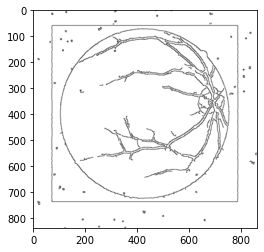

In [30]:
from skimage import filters

def sobel_each(image):
    return filters.sobel(image)

def sobel_hsv(image):
    return filters.sobel(image)

sobele = (1 - sobel_hsv(edges))

plt.imshow(sobele, cmap='gray')

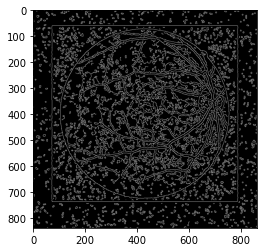

In [31]:
from skimage.transform import probabilistic_hough_line

edges = canny(gray, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

plt.imshow(edges, cmap='gray')

Text(0.5, 1.0, 'Filling the Holes')

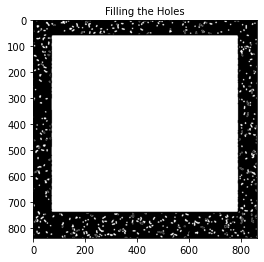

In [32]:
fill_eye = ndi.binary_fill_holes(edges)

plt.imshow(fill_eye, cmap='gray')
plt.title('Filling the Holes', fontsize=10)

Text(0.5, 1.0, 'Remove Small Objects')

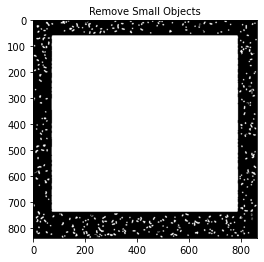

In [33]:
label_objects, nb_labels = ndi.label(fill_eye)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
eye_cleaned = mask_sizes[label_objects]

plt.imshow(eye_cleaned, cmap='gray')
plt.title('Remove Small Objects', fontsize=10)

### Region-based segmentation

In [34]:
from skimage.filters import sobel
from skimage.segmentation import watershed

### Sobel

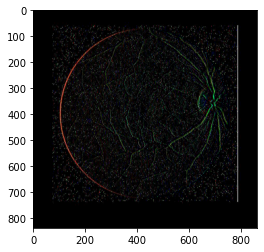

In [35]:
sobelcv = cv2.Sobel(im,-1, 1, 0, ksize=3)
plt.imshow(sobelcv,'gray')

Text(0.5, 1.0, 'Surface plot')

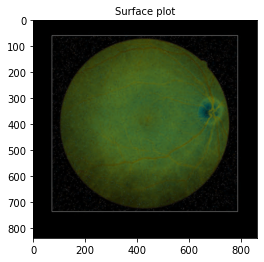

In [36]:
elevation = sobel(im)

plt.imshow(elevation, cmap='gray')
plt.title('Surface plot', fontsize=10)

Text(0.5, 1.0, 'Surface plot')

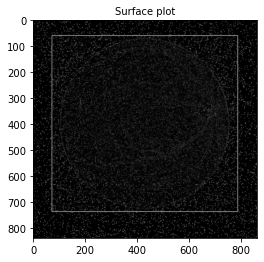

In [37]:
elevation_map = sobel(gray)

plt.imshow(elevation_map, cmap='gray')
plt.title('Surface plot', fontsize=10)

Text(0.5, 1.0, 'Segmentation')

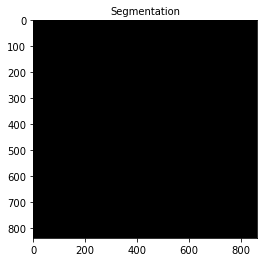

In [38]:
markers = np.zeros_like(im)

segmentation_ = watershed(elevation, markers)

plt.imshow(segmentation_, cmap='gray')
plt.title('Segmentation', fontsize=10)

Text(0.5, 1.0, 'Segmentation')

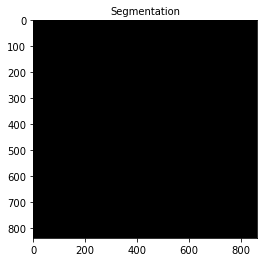

In [39]:
markers = np.zeros_like(gray)

segmentation = watershed(elevation_map, markers)

plt.imshow(segmentation, cmap='gray')
plt.title('Segmentation', fontsize=10)

Text(0.5, 1.0, 'Segmentation')

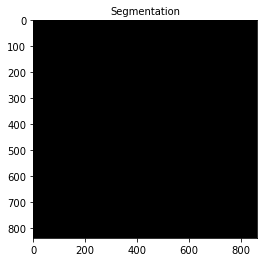

In [40]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

plt.imshow(segmentation, cmap='gray')
plt.title('Segmentation', fontsize=10)

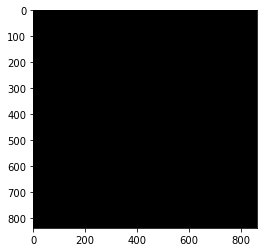

In [41]:
labeled_eye, _ = ndi.label(segmentation)

plt.imshow(labeled_eye, cmap='gray')

### Edge Operator

In [42]:
from skimage import filters
from skimage.filters import meijering, sato, frangi, hessian

In [43]:
edge_roberts = filters.roberts(gray)
edge_sobel = filters.sobel(gray)
edge_scharr = filters.scharr(gray)
edge_prewitt = filters.prewitt(gray)
edge_meijering = meijering(gray)
edge_sato = sato(gray)
edge_frangi = frangi(gray)
edge_hessian = hessian(gray)

<ipython-input-43-bfcc7a9a55a0>:6: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  edge_sato = sato(gray)
<ipython-input-43-bfcc7a9a55a0>:8: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  edge_hessian = hessian(gray)


Text(0.5, 1.0, 'Roberts Edge Detection')

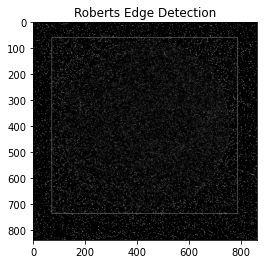

In [44]:
plt.imshow(edge_roberts, cmap='gray')
plt.title('Roberts Edge Detection')

Text(0.5, 1.0, 'Sobel Edge Detection')

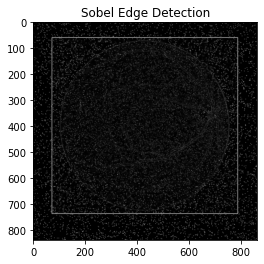

In [45]:
plt.imshow(edge_sobel, cmap='gray')
plt.title('Sobel Edge Detection')

Text(0.5, 1.0, 'Scharr Edge Detection')

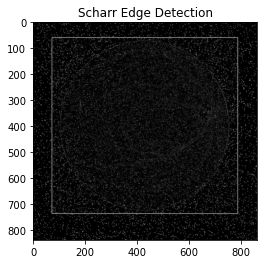

In [46]:
plt.imshow(edge_scharr, cmap='gray')
plt.title('Scharr Edge Detection')

Text(0.5, 1.0, 'Prewitt Edge Detection')

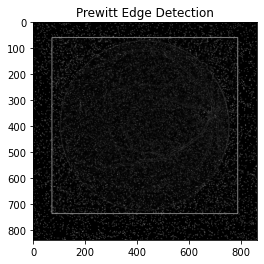

In [47]:
plt.imshow(edge_prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')

Text(0.5, 1.0, 'Meijering Edge Detection')

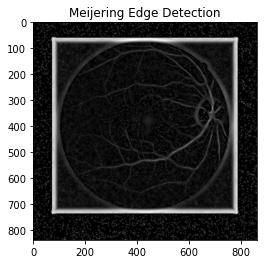

In [48]:
plt.imshow(edge_meijering, cmap='gray')
plt.title('Meijering Edge Detection')

Text(0.5, 1.0, 'Sato Edge Detection')

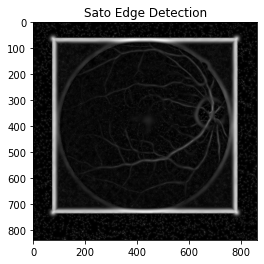

In [49]:
plt.imshow(edge_sato, cmap='gray')
plt.title('Sato Edge Detection')

Text(0.5, 1.0, 'Frangi Edge Detection')

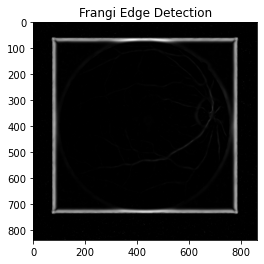

In [50]:
plt.imshow(edge_frangi, cmap='gray')
plt.title('Frangi Edge Detection')

Text(0.5, 1.0, 'Hessian Edge Detection')

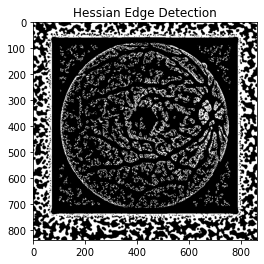

In [51]:
plt.imshow(edge_hessian, cmap='gray')
plt.title('Hessian Edge Detection')

# Edge Detection

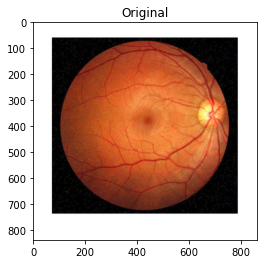

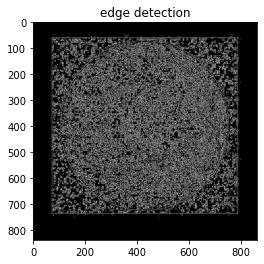

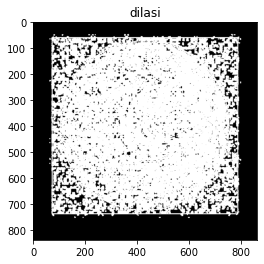

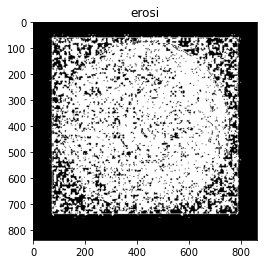

In [52]:
canny1 = cv2.Canny(im,30,30)

kernel = np.ones((4,4),np.uint8)
kernel_erosi = np.ones((3,3),np.uint8)
dilasi = cv2.dilate(canny1, kernel, iterations = 1)
erosi = cv2.erode(dilasi, kernel_erosi, iterations = 1)

plt.imshow(im)
plt.title("Original")
plt.show()

plt.imshow(canny1,cmap="gray")
plt.title("edge detection")
plt.show()

plt.imshow(dilasi,cmap="gray")
plt.title("dilasi")
plt.show()

plt.imshow(erosi,cmap="gray")
plt.title("erosi")
plt.show()

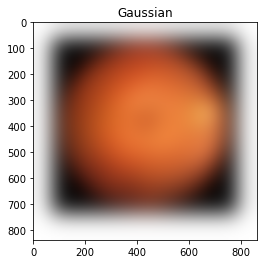

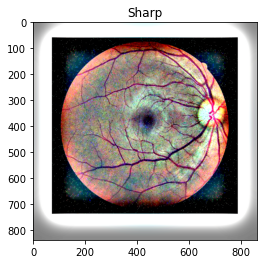

In [53]:
img_gaussian = cv2.GaussianBlur(im,(0,0),40)
img_sharp = cv2.addWeighted(im,4,img_gaussian,-4, 128)

plt.imshow(img_gaussian)
plt.title("Gaussian")
plt.show()

plt.imshow(img_sharp)
plt.title("Sharp")
plt.show()

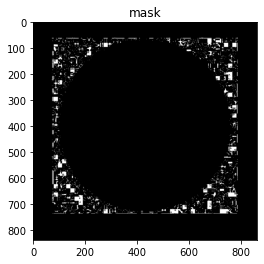

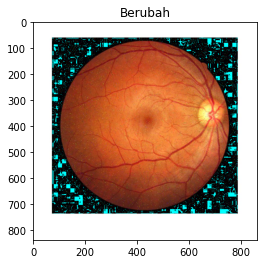

In [54]:
# Define lower and uppper limits
mask_lo=np.array([0,0,0])
mask_hi=np.array([0,0,0])

# Mask image to only select browns
mask=cv2.inRange(im,mask_lo,mask_hi)

# Change image to green where we found white
im[mask>0]=(0,255,255)

plt.imshow(mask,cmap="gray")
plt.title("mask")
plt.show()

plt.imshow(im)
plt.title("Berubah")
plt.show()

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

In [56]:
def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = img_as_float(gray)

# Initial level set
init_ls = checkerboard_level_set(gray.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(gray,iterations=2, init_level_set=init_ls,
                             smoothing=3, iter_callback=callback)

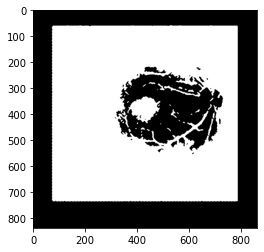

In [57]:
plt.imshow(ls, cmap='gray')

In [58]:
# Morphological GAC
image = img_as_float(gray)
gimage = inverse_gaussian_gradient(gray)

# Initial level set
init_ls = np.zeros(gray.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_geodesic_active_contour(gimage, iterations=1,
                                           init_level_set=init_ls,
                                           smoothing=1, balloon=-1,
                                           threshold=0.69,
                                           iter_callback=callback)

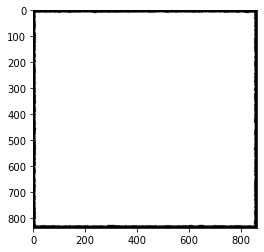

In [59]:
plt.imshow(ls, cmap='gray')

In [60]:
from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity

In [61]:
# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
markers = np.zeros(gray.shape, dtype=np.uint)
markers[gray < -0.95] = 1
markers[gray > 0.95] = 2

# Run random walker algorithm
labels = random_walker(gray, markers, beta=10, mode='bf')

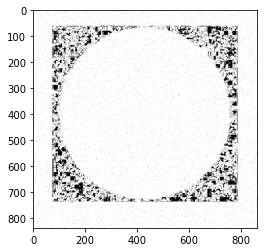

In [62]:
plt.imshow(markers, cmap='gray')

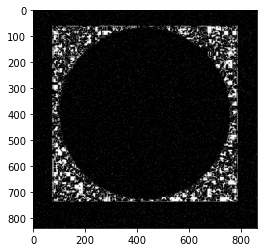

In [63]:
plt.imshow(labels, cmap='gray')

In [64]:
from skimage.segmentation import chan_vese

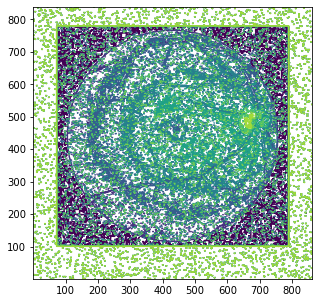

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))
qcs = ax.contour(gray, origin='image')

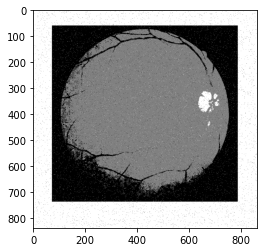

In [66]:
thresholds = filters.threshold_multiotsu(gray, classes=3)
regions = np.digitize(gray, bins=thresholds)

plt.imshow(regions, cmap='gray')

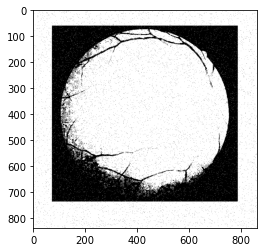

In [67]:
cells = gray > thresholds[0]

plt.imshow(cells, cmap='gray')

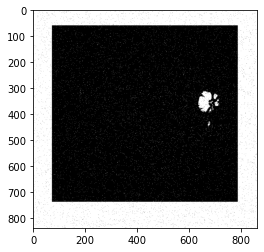

In [68]:
dividing = gray > thresholds[1]

plt.imshow(dividing, cmap='gray')

TypeError: Image data of dtype object cannot be converted to float

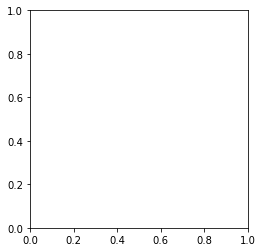

In [69]:
cv = chan_vese(gray, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, dt=0.5, init_level_set="checkerboard",
               extended_output=True)

plt.imshow(cv, cmap='gray')